In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

Pertama-tama kita mengimport berbagai fungsi library dan modul seperti numpy, pandas, matplotlib, tensorflow, dan sklearn.

In [ ]:
# import zipfile

# brain = zipfile.ZipFile('brain tumor dataset.zip')
# brain.extractall('/content')
# brain.close()

Kode di atas adalah kode Python untuk mengekstrak isi dari file ZIP yang disebut 'brain tumor dataset.zip' ke direktori '/content'.

In [ ]:
''' train and test path '''
train_path = 'Training'
test_path = 'Testing'

Kode di atas adalah pengaturan jalur (path) untuk direktori pelatihan dan pengujian dalam konteks pengolahan data atau pembangunan model machine learning. Kode ini mendefinisikan dua variabel yang akan digunakan untuk menyimpan jalur (path) ke direktori pelatihan dan pengujian

In [ ]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['meningioma_tumor', 'no_tumor', 'glioma_tumor', 'pituitary_tumor']


Kode di atas adalah penggunaan loop untuk mendapatkan daftar nama file atau direktori dalam direktori yang diwakili oleh train_path.

In [ ]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])
    count=count+1

Kode di atas adalah bagian dari proses membaca dan mempersiapkan data gambar untuk pelatihan model machine learning. Kode ini melakukan beberapa tugas penting dalam hal ini

In [ ]:
test_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])
    count=count+1

In [ ]:
train_images, train_labels = zip(*train_data)
test_images, tese_labels = zip(*test_data)

In [ ]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [ ]:
''' converting labels into to_categorical '''
test_labels = to_categorical(tese_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4)


In [ ]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=44)

In [ ]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [ ]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define input shape and number of classes
input_shape = (150, 150, 3)  # Adjust input shape as needed
num_classes = 4  # Adjust the number of classes based on your dataset

# Create the Inception V3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers for your specific task (classification)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
inceptionv3_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
inceptionv3_model.summary()


87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
# Training the model
History = inceptionv3_model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=30,callbacks=[history])

Epoch 1/30
72/72 [==============================] - 46s 641ms/step - loss: 0.2941 - accuracy: 0.8968 - val_loss: 1.4512 - val_accuracy: 0.5801
Epoch 2/30
72/72 [==============================] - 46s 642ms/step - loss: 0.3025 - accuracy: 0.8955 - val_loss: 0.5173 - val_accuracy: 0.8345
Epoch 3/30
72/72 [==============================] - 46s 640ms/step - loss: 0.2685 - accuracy: 0.9133 - val_loss: 1.6660 - val_accuracy: 0.6063
Epoch 4/30
72/72 [==============================] - 47s 645ms/step - loss: 0.2036 - accuracy: 0.9273 - val_loss: 0.3802 - val_accuracy: 0.8659
Epoch 5/30
72/72 [==============================] - 46s 640ms/step - loss: 0.2505 - accuracy: 0.9203 - val_loss: 0.6791 - val_accuracy: 0.7822
Epoch 6/30
72/72 [==============================] - 46s 640ms/step - loss: 0.2313 - accuracy: 0.9194 - val_loss: 0.3471 - val_accuracy: 0.8693
Epoch 7/30
72/72 [==============================] - 46s 640ms/step - loss: 0.1974 - accuracy: 0.9373 - val_loss: 0.7835 - val_accuracy: 0.7282

In [ ]:
''' prediction '''
y_pred=inceptionv3_model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

18/18 [==============================] - 3s 151ms/step
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       157
           1       0.95      0.65      0.77        81
           2       0.85      0.94      0.89       170
           3       0.77      0.99      0.86       166

    accuracy                           0.85       574
   macro avg       0.88      0.82      0.83       574
weighted avg       0.87      0.85      0.84       574



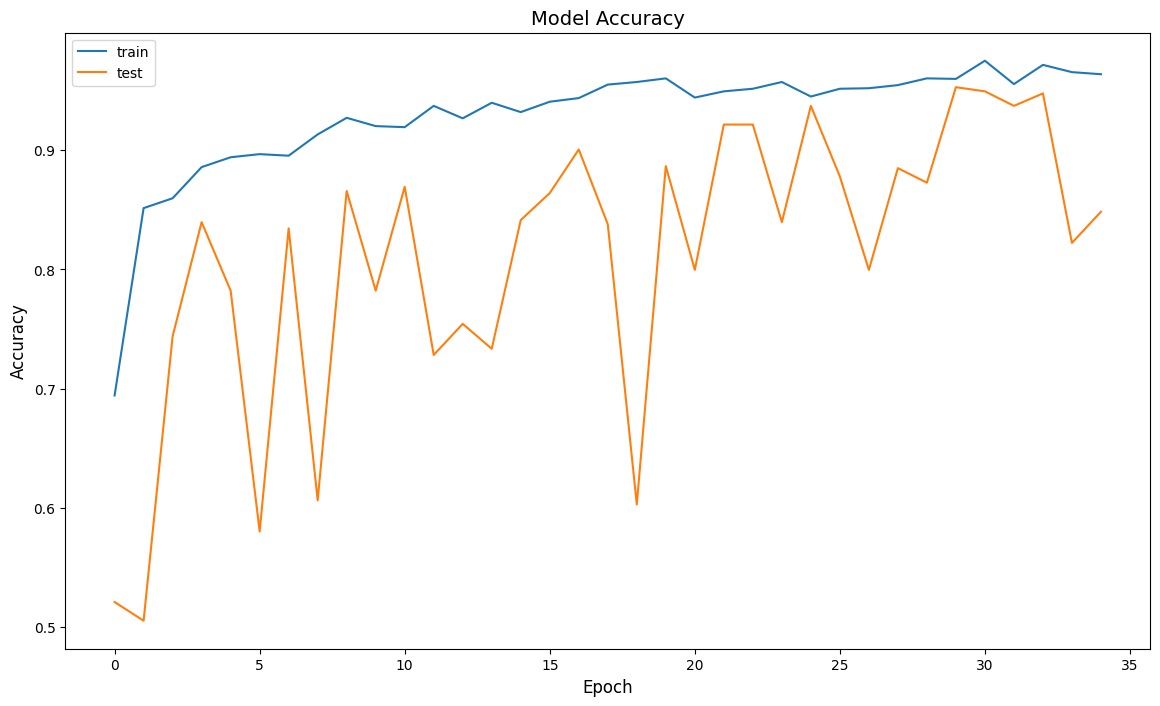

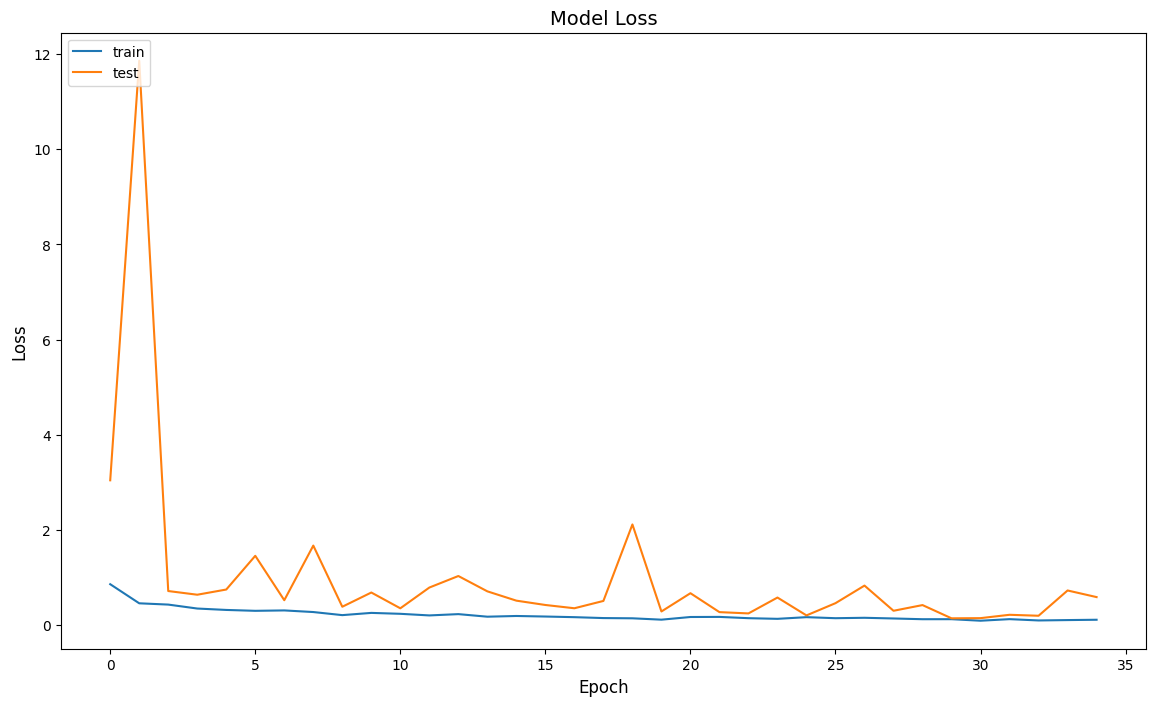

In [ ]:
# Plotting accuracy and loss curves
plt.figure(figsize=(14, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()